# Cardekho Multivariate regression

In [43]:
# import required libraries
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.metrics import r2_score

#create a car dataframe
car_df = pd.read_csv('D:\Machine Learning\Data sets\Car data.csv')
print (car_df.head())

c:\users\asus\appdata\local\programs\python\python35\lib\importlib\_bootstrap.py:222: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


  Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0  


                  Selling_Price     Kms_Driven
Kms_Driven                                    
(0, 50000]             4.545617   24612.429787
(50000, 100000]        5.096724   65226.741379
(100000, 150000]       7.050000  128772.200000
(150000, 200000]       3.490000  197176.000000
(200000, 250000]       0.310000  213000.000000


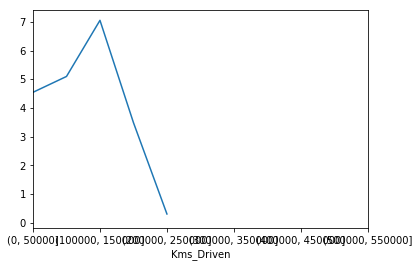

In [9]:
car_df1 = car_df[['Selling_Price','Kms_Driven']]
bins = np.arange(0,600000,50000)
groups = car_df1.groupby(pd.cut(car_df1['Kms_Driven'],bins)).mean()
print(groups.head())
groups['Selling_Price'].plot.line()

In [47]:
scale = StandardScaler()

X = car_df[['Kms_Driven','Present_Price','Owner']]

Y = car_df[['Selling_Price']]

X[['Kms_Driven', 'Present_Price', 'Owner']] = scale.fit_transform(X[['Kms_Driven', 'Present_Price', 'Owner']].as_matrix())

print (X.head())

predict_price = sm.OLS(Y,X).fit()


print(predict_price.summary())

c:\users\asus\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys
c:\users\asus\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
c:\users\asus\appdata\local\programs\python\python35\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


   Kms_Driven  Present_Price     Owner
0   -0.256224      -0.236215 -0.174501
1    0.155911       0.221505 -0.174501
2   -0.773969       0.257427 -0.174501
3   -0.817758      -0.403079 -0.174501
4    0.141743      -0.087890 -0.174501
                                 OLS Regression Results                                
Dep. Variable:          Selling_Price   R-squared (uncentered):                   0.435
Model:                            OLS   Adj. R-squared (uncentered):              0.430
Method:                 Least Squares   F-statistic:                              76.60
Date:                Sun, 12 Jan 2020   Prob (F-statistic):                    9.40e-37
Time:                        23:08:57   Log-Likelihood:                         -922.04
No. Observations:                 301   AIC:                                      1850.
Df Residuals:                     298   BIC:                                      1861.
Df Model:                           3                         

#### Here the R square value (0.435) is pretty low and we get a sense that the model poorly fits the input data.

In [49]:
# making a prediction for a new input

newinput_scaled = scale.transform([[1000,14.5, 1]])
print(newinput_scaled)

new_prediction = predict_price.predict(newinput_scaled[0])

print(new_prediction)


[[-0.92594378  0.79626092  3.86585888]]
[2.75915699]
